In [1]:
from Invariant_Flow import *
from rover_planning import *
from SE2Lie import *
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
# autoreload modules so you don't need to restart kernel

In [2]:
%load_ext autoreload
%autoreload 2

# Trajectory planning and control

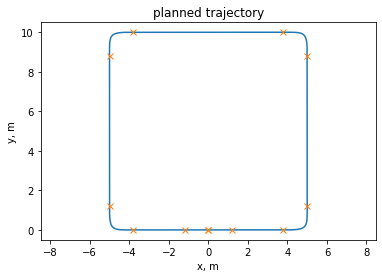

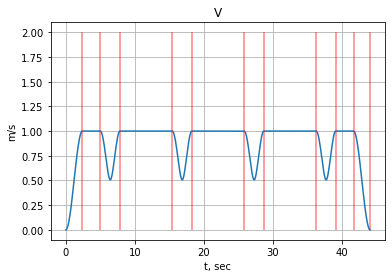

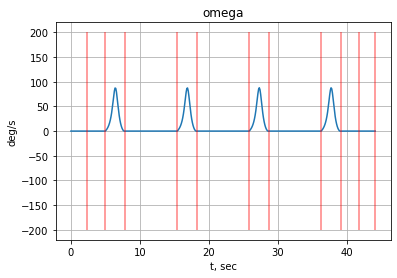

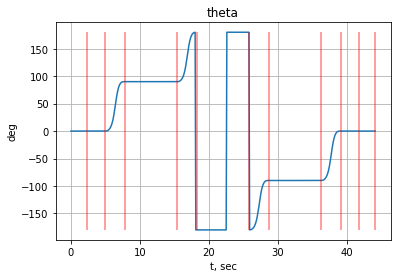

In [80]:
v  = 1
r = 1.2
planner = RoverPlanner(x=0, y=0, v=v, theta=0, r=r)
planner.goto(5, 0, v, r)
planner.goto(5, 10, v, r)
planner.goto(-5, 10, v, r)
planner.goto(-5, 0, v, r)
planner.goto(0, 0, v, r)
# planner.goto(-6, 6, v, r)
# planner.goto(0, 6, v, r)
# planner.goto(0, 12, v, r)
# planner.goto(6, 12, v, r)
# planner.goto(6, 6, v, r)
# planner.goto(-6, 6, v, r)
# planner.goto(-6, 12, v, r)
planner.stop(0, 0)

ref_data = planner.compute_ref_data(plot=True)
x_r = ref_data['way_points'][0,:]
y_r = ref_data['way_points'][1,:]

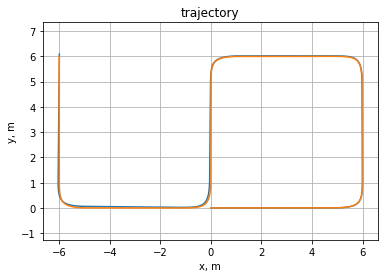

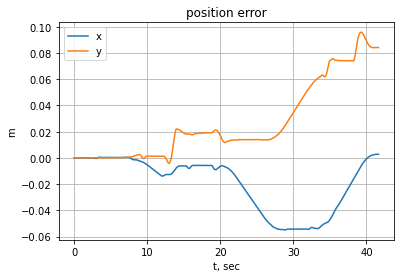

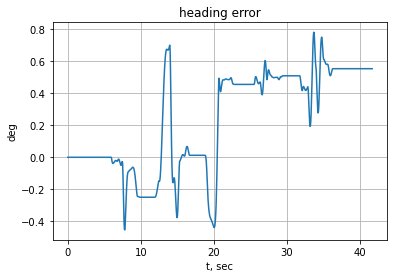

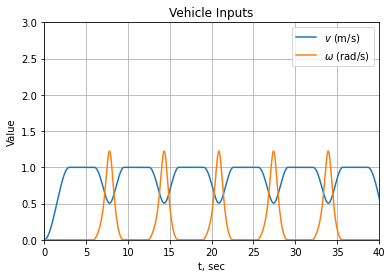

In [11]:
res = simulate_rover(planner, freq_d=.015, w1=0, w2=0, x0=0, y0=0, theta0=0*np.pi/100, dist='sine', dt=.05, use_approx=False)
# res = simulate_rover(planner, freq_d=.04, w1=1, w2=1, x0=0.1, y0=0.1, theta0=np.pi/100, dist='sine', dt=.05, use_approx=False)
plot_rover_sim(res=res, planner=planner)

# Invariant Set

In [93]:
w1 = 1
w2 = 1
e = np.array([0.1,0.1,np.pi/100]) # Lie Group
e0 = SE2(e[0], e[1], e[2]).log.vee # Lie Algebra
t = 0
sol = find_se2_invariant_set(-np.pi/2, np.pi/2, 1, 1)
zeta = iteration(w1, w2, e0, t, sol)
print(zeta)

-1.766456316949337
{'cost': 2.604704215266059, 'prob': <Semidefinite Program>, 'mu1': 1.7829223342484515, 'mu2': 0.8217818810176079, 'P': array([[1.59837748e+00, 8.42474448e-10, 1.13248001e-09],
       [8.42474448e-10, 2.95920468e+00, 2.48938267e+00],
       [1.13248001e-09, 2.48938267e+00, 2.78594368e+00]]), 'alpha': 1.0345614201725593, 'gam': <1×1 Real Linear Expression: mu_1 + mu_2>}
[0.198896   0.293469   0.30247993]


In [94]:
v1 = sv1(zeta[2])
v2 = sv2(zeta[0], zeta[1],zeta[2])

points = se2_lie_algebra_invariant_set_points(sol, 10, v1*w1 + v2*w2, w2, e0) #Lie Algebra

inv_points = np.zeros((3,points.shape[1]))
for i in range(points.shape[1]):
    exp_points = se2(points[0,i], points[1,i], points[2,i]).exp
    inv_points[:,i] = np.array([exp_points.x, exp_points.y, exp_points.theta])

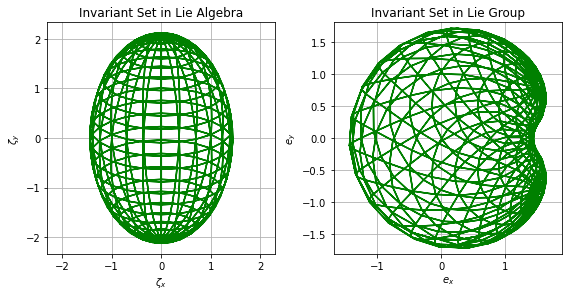

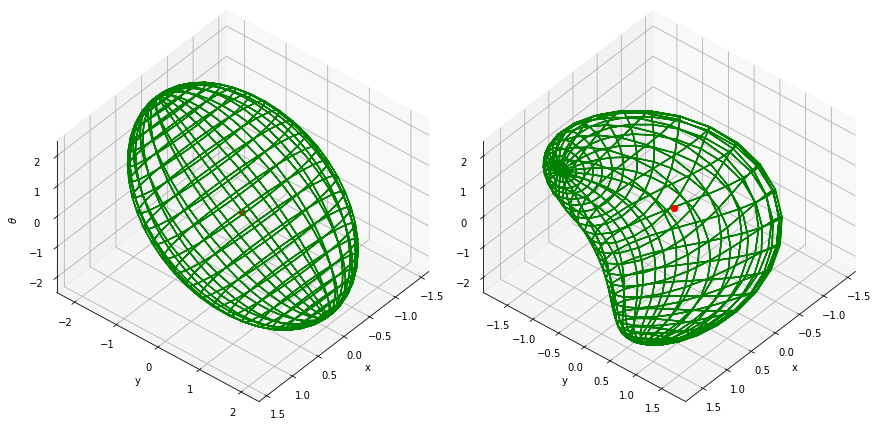

In [95]:
plt.figure(figsize=(8,4))
ax = plt.subplot(121)
ax.plot(points[0, :], points[1, :], 'g')
ax.set_xlabel('$\\zeta_x$')
ax.set_ylabel('$\\zeta_y$')
# ax.plot(e0[0],e0[1],'ro')
plt.axis('equal')
plt.grid(True)
ax2 = plt.subplot(122)
ax2.plot(inv_points[0, :-1], inv_points[1, :-1], 'g')
# ax2.plot(e[0],e[1],'ro')
ax2.set_xlabel('$e_x$')
ax2.set_ylabel('$e_y$')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
ax.set_title('Invariant Set in Lie Algebra')
ax2.set_title('Invariant Set in Lie Group')

# plt.figure(figsize=(8,4))
# ax = plt.subplot(121)
# ax.plot(points[1, :], points[2, :], 'g')
# ax.set_xlabel('y')
# ax.set_ylabel('$\\theta$')
# plt.axis('equal')
# ax2 = plt.subplot(122)
# ax2.plot(exp_points[1, :], exp_points[2, :], 'g')
# ax2.set_xlabel('y')
# ax2.set_ylabel('$\\theta$')
# plt.axis('equal')
# plt.tight_layout()

# plt.figure(figsize=(8,4))
# ax = plt.subplot(121)
# ax.plot(points[0, :], points[2, :], 'g');
# ax.set_xlabel('x')
# ax.set_ylabel('$\\theta$')
# plt.axis('equal')
# ax2 = plt.subplot(122)
# ax2.plot(exp_points[0, :], exp_points[2, :], 'g');
# ax2.set_xlabel('x')
# ax2.set_ylabel('$\\theta$')
# plt.axis('equal')
# plt.tight_layout()

plt.figure(figsize=(12,6))
ax = plt.subplot(121, projection='3d', proj_type='ortho', elev=40, azim=40)
ax.plot3D(e0[0], e0[1], e0[2], 'ro');
ax.plot3D(points[0, :], points[1, :], points[2, :],'g');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\\theta$')
plt.axis('auto')
ax2 = plt.subplot(122, projection='3d', proj_type='ortho', elev=40, azim=40)
ax2.plot3D(e[0], e[1], e[2], 'ro');
ax2.plot3D(inv_points[0, :], inv_points[1, :], inv_points[2, :], 'g');
ax2.plot3D(e[0], e[1], e[2], 'ro');
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.axis('auto')
plt.tight_layout()

[ 1.70000000e+00 -4.16379912e-16]
[ 1.85349934e+00 -4.53976408e-16]
1.8534993435580753


Text(0.5, 1.0, 'Invariant Set')

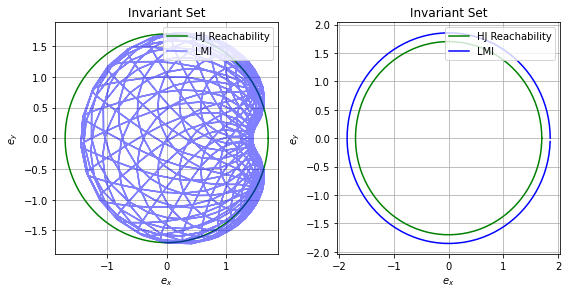

In [96]:
r= 1.7 #.2 #1.7
hj_points = hj_invariant_set_points(r)
print(hj_points[:,-1])
dist = np.zeros((inv_points.shape[1]))
for i in range(inv_points.shape[1]):
    dist[i] = np.sqrt(inv_points[1,i]**2 + inv_points[0,i]**2)
LG_swe_points = hj_invariant_set_points(dist.max())
print(LG_swe_points[:,-1])
print(dist.max())

plt.figure(figsize=(8,4))
ax = plt.subplot(121)
ax.plot(hj_points[0, :], hj_points[1, :], 'g', label='HJ Reachability');
ax.plot(inv_points[0, :-1], inv_points[1, :-1], 'b', alpha = 0.5, label='LMI');
ax.legend(loc=1)
ax.set_xlabel('$e_x$')
ax.set_ylabel('$e_y$')
# ax.hlines(-1.7, -1.5, 1.5)
#ax.plot(e0[0],e0[1],'ro')
# ax.set_xlim([-3,3])
# ax.set_ylim([-3,3])
plt.grid(True)
ax2 = plt.subplot(122)
ax2.plot(hj_points[0, :], hj_points[1, :], 'g', label='HJ Reachability');
ax2.plot(LG_swe_points[0, :-1], LG_swe_points[1, :-1], 'b', label='LMI');
#ax2.plot(e[0],e[1],'ro')
ax2.legend(loc=1)
ax2.set_xlabel('$e_x$')
ax2.set_ylabel('$e_y$')
plt.grid(True)
plt.tight_layout()
ax.set_title('Invariant Set')
ax2.set_title('Invariant Set')

# Flow Pipes Simulation

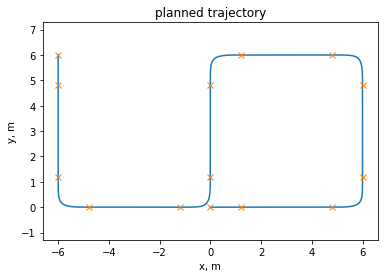

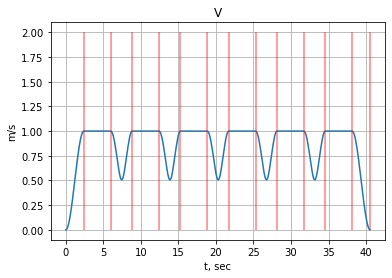

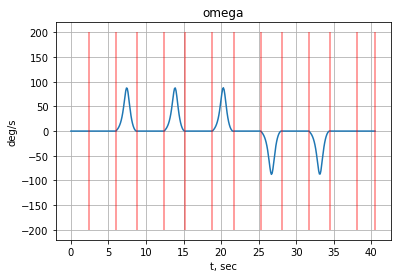

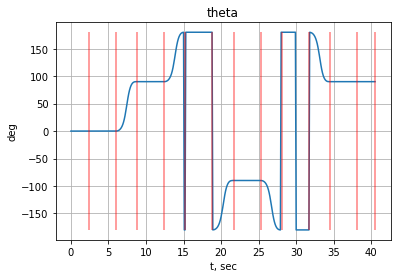

In [81]:
v  = 1
r = 1.2
planner = RoverPlanner(x=0, y=0, v=v, theta=0, r=r)
planner.goto(6, 0, v, r)
planner.goto(6, 6, v, r)
planner.goto(0, 6, v, r)
planner.goto(0, 0, v, r)
planner.goto(-6, 0, v, r)
planner.goto(-6, 6, v, r)
# planner.goto(0, 6, v, r)
# planner.goto(0, 12, v, r)
# planner.goto(6, 12, v, r)
# planner.goto(6, 6, v, r)
# planner.goto(-6, 6, v, r)
# planner.goto(-6, 12, v, r)
planner.stop(-6, 6)

ref_data = planner.compute_ref_data(plot=True)
x_r = ref_data['way_points'][0,:]
y_r = ref_data['way_points'][1,:]
omega = ref_data['omega']
ref_theta = ref_data['theta']    

In [320]:
n = 35*2# number of interval hulls
# disturbances
w1s = .1
w2s = .1
w1l = 1
w2l = 1
# sol_s = find_se2_invariant_set() # u, v, w1, w2

e0 = SE2(.1, .1, 0).log.vee
x0 = np.array([0,0,0])

# n_hull, flow_pipes_LMI1, intervalhull_LMI, nom, t_vect, Rx1s, Rx2s, Ry1s, Ry2s = flowpipes(planner, n, e0, w1s, w2s)
n_hull, flow_pipes_LMI2, intervalhull_LMI, nom, t_vect, Rx1l, Rx2l, Ry1l, Ry2l = flowpipes(planner, n, e0, w1l, w2l)

Text(0, 0.5, 'y')

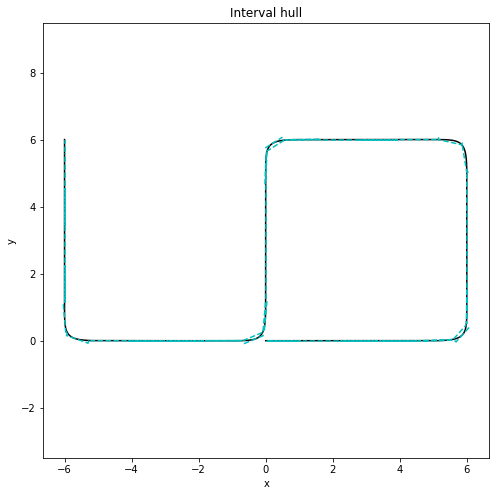

In [169]:
# interval hull
plt.figure(figsize=(8,8))
ax = plt.subplot(111)
h_nom = ax.plot(nom[:,0], nom[:,1], color='k', linestyle='-')
for facet in range(n_hull):
    hs_ch_LMI = ax.plot(intervalhull_LMI[facet][:,0], intervalhull_LMI[facet][:,1], color='c', linestyle='--')

plt.axis('equal')
plt.title('Interval hull')
plt.xlabel('x')
plt.ylabel('y')

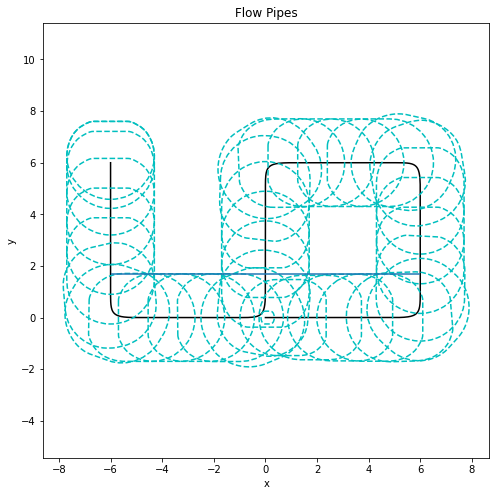

In [299]:
# flow pipes
plt.figure(figsize=(8,8))
ax = plt.subplot(111)
h_nom = ax.plot(nom[:,0], nom[:,1], color='k', linestyle='-')
for facet in range(n_hull):
    hs_ch_LMI = ax.plot(flow_pipes_LMI2[facet][:,0], flow_pipes_LMI2[facet][:,1], color='c', linestyle='--')
    #hs_ch_LMI_L = ax.plot(flow_pipes_LMI_L[facet][:,0], flow_pipes_LMI_L[facet][:,1], color='y', linestyle='--')
    #hs_ch_Hs = ax.plot(flow_pipes_Hs[facet][:,0], flow_pipes_Hs[facet][:,1], color='m', linestyle='--', alpha = 0.5)

plt.axis('equal')
plt.title('Flow Pipes')
plt.xlabel('x')
plt.ylabel('y')
plt.hlines(1.7, -6, 6)
#legend([h_nom[0], hs_ch_LMI[0], hs_ch_LMI_L[0]], ['nominal', 'flow pipe (small)', 'flow pipe (Large)'], loc=1);

# Trajectories simulation with flow pipe

In [121]:
V2 = np.array([[1, 0], [-1, 0], [0, -1], [0, 1]])
rot_mat5 = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],
                     [np.sin(np.pi/4), np.cos(np.pi/4)]])
P2 = rot_mat5*Polytope(V2)
p4 = (5, 4)
P3 = P2*1.5 + (-2,5)
P4 = P2 + p4

P5 = 0.5*P3 - (2, 1)

[[ 0.1       ]
 [-0.1       ]
 [-0.03141593]]
[ 0.10156257 -0.09842098 -0.03141593]


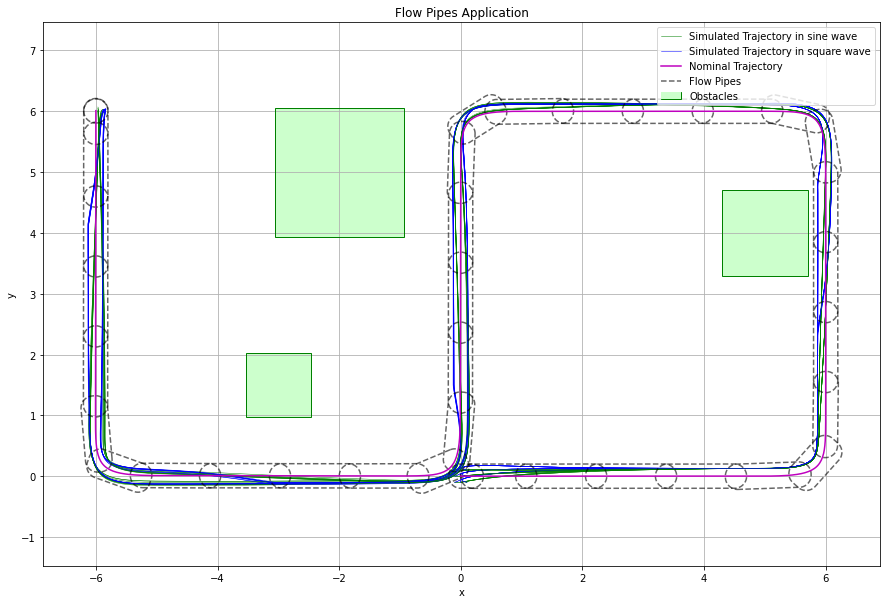

In [300]:
# small distrubance
freq = [0.04, 0.05]#, 0.08, 0.09]#,0.04,0.05
e = []
V = []
# number of interval hulls
# disturbances

cnt = 0
for theta0 in np.arange(-np.pi/100, np.pi/100, 3):
    for x0 in np.linspace(-.1, .1, 3):
        for y0 in np.linspace(-.1, .1, 3):
            cnt += 1
            init_e = np.array([[x0, y0, theta0]]).T
            V0 = init_e.T@sol['P']@init_e
            V.append(V0)
            e.append(init_e)
            for i, f in enumerate(freq):
                res = simulate_rover(planner, f, w1s, w2s, x0, y0, theta0, dist='sine', dt=0.05, use_approx = False)
                res1 = simulate_rover(planner, f, w1s, w2s, x0, y0, theta0, dist='square', dt=0.05, use_approx = False)
                legend = cnt == 1 and i == 0
                plot_rover_simulated(res, name=' in sine wave', legend=legend, save=False, linewidth = .5, color = 'g')
                plot_rover_simulated(res1, name=' in square wave', legend=legend, save=False, linewidth = .5, color = 'b')
                #if i == len(freq) - 1:
                    #r3 = simulate_rover(planner, f, w1, w2, 0, 0, theta0, dist='maxdV', sol= sol_s)
                    #plot_rover_simulated(r3, name='maxdV', legend= (cnt == 1), save=False, linewidth = 1, color = 'r')

i = np.array(V).argmax()
print(e[i])
e0 = SE2(e[i][0], e[i][1], e[i][2]).log.vee
print(e0)
# n, flow_pipes_LMI, intervalhull_LMI, nom = flowpipes_traj(planner, res1, x_r, y_r, n, e0, w1, w2)
n_hull, flow_pipes_hj, intervalhull, nom = flowpipeshj(x_r, y_r, n, e0, w1, w2, .2)
for facet in range(n_hull):
    hs_ch_LMI = plt.plot(flow_pipes_hj[facet][:,0], flow_pipes_hj[facet][:,1], color='k', linestyle='--', alpha = 0.6)

obs = P4.plot(facecolor=(0.8,1,0.8), edgecolor='g', linewidth=1)
P3.plot(facecolor=(0.8,1,0.8), edgecolor='g', linewidth=1)
P5.plot(facecolor=(0.8,1,0.8), edgecolor='g', linewidth=1)

h_nom = plt.plot(nom[:,0], nom[:,1], color='m', linestyle='-')

plt.axis('equal')
plt.title('Flow Pipes Application')
plt.xlabel('x')
plt.ylabel('y')

lgd = plt.legend(loc=1)
ax = lgd.axes
handles, labels = ax.get_legend_handles_labels()
handles.append(h_nom[0])
labels.append('Nominal Trajectory')
handles.append(hs_ch_LMI[0])
labels.append('Flow Pipes')
handles.append(obs)
labels.append('Obstacles')
lgd._legend_box = None
lgd._init_legend_box(handles, labels)
lgd._set_loc(lgd._loc)
lgd.set_title(lgd.get_title().get_text())

[[-0.1       ]
 [-0.1       ]
 [-0.03141593]]
[-0.09842098 -0.10156257 -0.03141593]


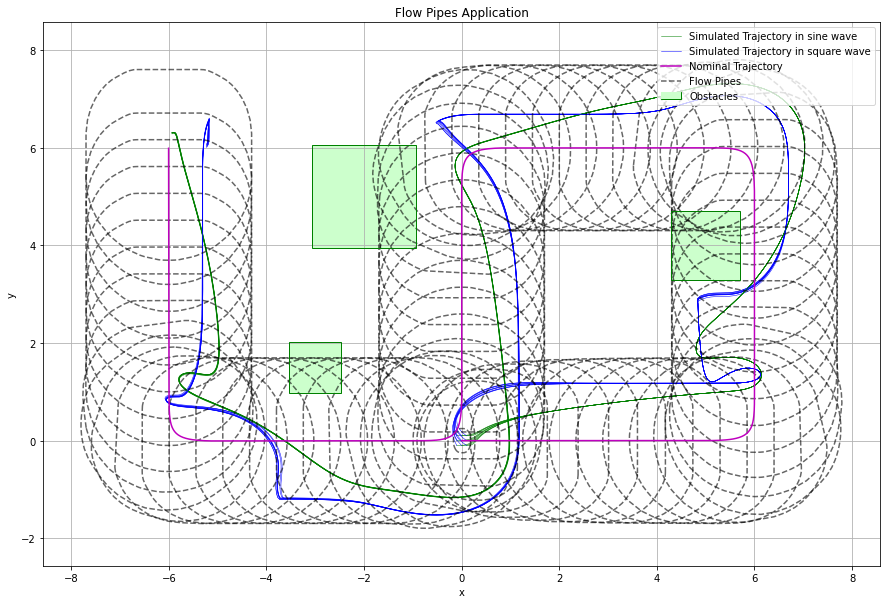

In [322]:
# large distrubance
# 0.04 0.1
freq = [0.05]#0.04, 0.05, 0.08, 0.09]# [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
e = []
V = []

cnt = 0
for theta0 in np.arange(-np.pi/100, np.pi/100, 3):
    for x0 in np.linspace(-.1, .1, 3):
        for y0 in np.linspace(-.1, .1, 3):
            cnt += 1
            init_e = np.array([[x0, y0, theta0]]).T
            V0 = init_e.T@sol['P']@init_e
            V.append(V0)
            e.append(init_e)
            for i, f in enumerate(freq):
                res = simulate_rover(planner, f, w1l, w2l, x0, y0, theta0, dist='sine', dt=.05, use_approx = False)
                res1 = simulate_rover(planner, f, w1l, w2l, x0, y0, theta0, dist='square', dt=.05, use_approx = False)
                legend = cnt == 1 and i == 0
                plot_rover_simulated(res, name=' in sine wave', legend=legend, save=False, linewidth = .5, color = 'g')
                plot_rover_simulated(res1, name=' in square wave', legend=legend, save=False, linewidth = .5, color = 'b')
                #if i == len(freq) - 1:
                    #r3 = simulate_rover(planner, f, w1, w2, 0, 0, theta0, dist='maxdV', sol= sol_s)
                    #plot_rover_simulated(r3, name='maxdV', legend= (cnt == 1), save=False, linewidth = 1, color = 'r')

i = np.array(V).argmax()
print(e[i])
e0 = SE2(e[i][0], e[i][1], e[i][2]).log.vee
print(e0)
# n_hull, flow_pipes_hj, intervalhull, nom = flowpipeshj(x_r, y_r, n, e0, w1, w2, 1.7)
for facet in range(n_hull):
    hs_ch_LMI = plt.plot(flow_pipes_LMI2[facet][:,0], flow_pipes_LMI2[facet][:,1], color='k', linestyle='--', alpha = 0.6)

obs = P4.plot(facecolor=(0.8,1,0.8), edgecolor='g', linewidth=1)
P3.plot(facecolor=(0.8,1,0.8), edgecolor='g', linewidth=1)
P5.plot(facecolor=(0.8,1,0.8), edgecolor='g', linewidth=1)


h_nom = plt.plot(nom[:,0], nom[:,1], color='m', linestyle='-')
# plt.plot(nom[149,0], nom[149,1], '.')
# plt.plot(nom[277,0], nom[277,1], '^')
# plt.plot(nom[406,0], nom[406,1], 'o')
# plt.plot(nom[534,0], nom[534,1], 'o')
# plt.plot(nom[663,0], nom[663,1], '*')

plt.axis('equal')
plt.title('Flow Pipes Application')
plt.xlabel('x')
plt.ylabel('y')
# plt.hlines(1.7, -6, 6)

lgd = plt.legend(loc=1)
ax = lgd.axes
handles, labels = ax.get_legend_handles_labels()
handles.append(h_nom[0])
labels.append('Nominal Trajectory')
handles.append(hs_ch_LMI[0])
labels.append('Flow Pipes')
handles.append(obs)
labels.append('Obstacles')
lgd._legend_box = None
lgd._init_legend_box(handles, labels)
lgd._set_loc(lgd._loc)
lgd.set_title(lgd.get_title().get_text())

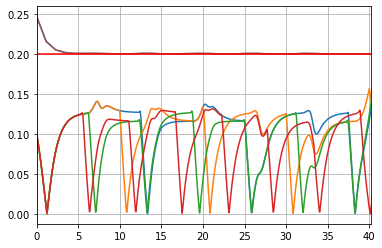

In [303]:
freq = [0.04, 0.05, 0.08, 0.09]#, 0.03]#3, 0.04, 0.2, 0.02]#, 0.2, 0.7]#, 0.4]#, 0.05, 0.5]#, 0.08, 0.025]#, .02]#, .03]#, .05]#, .05, .07, .09]
dist = ['square']
# t_vect2 = np.linspace(0,t_vect[-1],len(t_vect))
w1s = .1
w2s = .1
# e = np.array([0.1,0.1,np.pi/100]) # Lie Group
# e0 = SE2(e[0], e[1], e[2]).log.vee # Lie Algebra
# omega0 = 0
# R1 = []
# R2 = []
# sol = find_se2_invariant_set(-np.pi/2, np.pi/2)
# zeta = iteration(w1s, w2s, e0, 0, sol)
# v1 = sv1(zeta[2])
# v2 = sv2(zeta[0], zeta[1],zeta[2])
# w1 = v1*w1s + v2*w2s
# w2 = w2s
for i, f in enumerate(freq):
    for d in dist:
        res = simulate_rover(planner, f, w1s, w2s, -0.1, -0.1, -np.pi/100, dist = d, dt=.05, use_approx = False)
        y_vect = res['y']
        x, y, theta, x_r, y_r, theta_r, log_e_x, log_e_y, log_e_theta = [y_vect[i, :] for i in range(len(y_vect))]
        err = np.array([compute_err(y[3], y[4], y[5], y[0], y[1], y[2]) for y in y_vect.T]).T
        err_y = np.abs(err[1,:])
        plt.plot(res['t'], err_y)

plt.plot(t_vect, Ry1s)
plt.plot(t_vect, Ry2s)
plt.hlines(0.2, 0, t_vect[-1], color='red')
plt.xlim(0, t_vect[-1])
plt.grid()

# for i in range(len(t_vect)):
#     t = t_vect[i]
#     points = se2_lie_algebra_invariant_set_points(sol, t, w1, w2, e0) #Lie Algebra
#     inv_points = np.zeros((3,points.shape[1]))
#     for j in range(points.shape[1]):
#         exp_points = se2(points[0,j], points[1,j], points[2,j]).exp
#         inv_points[:,j] = np.array([exp_points.x, exp_points.y, exp_points.theta])
#     ang_list = []
#     a = int(t_vect[i]/0.05)
#     if i < 35:
#         b = int(t_vect[i+1]/0.05+1)
#     else:
#         b = int(res['t'][-1]/0.05)
#     for k in range(a, b):
#         angle = ref_theta(0.05*k)
#         ang_list.append(angle)
#     inv_set = [[],[]]
#     for theta in ang_list:
#         inv_set1 = rotate_point(inv_points, theta)
#         inv_set = np.append(inv_set, inv_set1, axis = 1) 
#     inv_set = rotate_point(inv_set, -ref_theta(0.05*(a+b)/2))
    
#     max_y = inv_set[1,:].max()
#     min_y = abs(inv_set[1,:].min())
#     y_bound1 = np.round(min(max_y, min_y),6)
#     y_bound2 = np.round(max(max_y, min_y),6)
#     R1.append(y_bound1)
#     R2.append(y_bound2)
#     omega0 = omega(t)

# plt.plot(t_vect2, R1)
# plt.plot(t_vect2, R2)
# plt.hlines(0.2, 0, 40, color='red')

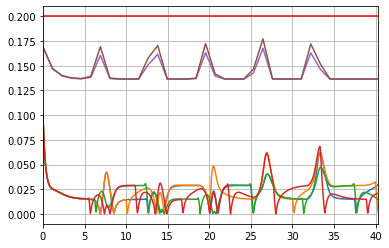

In [309]:
freq = [0.04, 0.05, 0.08, 0.09]#, 0.03]#3, 0.04, 0.2, 0.02]#, 0.2, 0.7]#, 0.4]#, 0.05, 0.5]#, 0.08, 0.025]#, .02]#, .03]#, .05]#, .05, .07, .09]
dist = ['square']
# t_vect2 = np.linspace(0,t_vect[-1],len(t_vect))
w1s = .1
w2s = .1
# e = np.array([0.1,0.1,np.pi/100]) # Lie Group
# e0 = SE2(e[0], e[1], e[2]).log.vee # Lie Algebra
# omega0 = 0
# R = []
# sol = find_se2_invariant_set(-np.pi/2, np.pi/2)
# zeta = iteration(w1s, w2s, e0, 0, sol)
# v1 = sv1(zeta[2])
# v2 = sv2(zeta[0], zeta[1],zeta[2])
# w1 = v1*w1s + v2*w2s
# w2 = w2s
for i, f in enumerate(freq):
    for d in dist:
        res = simulate_rover(planner, f, w1s, w2s, -0.1, -0.1, -np.pi/100, dist = d, dt=.05, use_approx = False)
        y_vect = res['y']
        x, y, theta, x_r, y_r, theta_r, log_e_x, log_e_y, log_e_theta = [y_vect[i, :] for i in range(len(y_vect))]
        err = np.array([compute_err(y[3], y[4], y[5], y[0], y[1], y[2]) for y in y_vect.T]).T
        err_x = np.abs(err[0,:])
        plt.plot(res['t'], err_x)

plt.plot(t_vect, Rx1s)
plt.plot(t_vect, Rx2s)
plt.hlines(0.2, 0, t_vect[-1], color='red')
plt.xlim(0, t_vect[-1])
plt.grid()
        
# for i in range(len(t_vect)):
#     t = t_vect[i]
#     points = se2_lie_algebra_invariant_set_points(sol, t, w1, w2, e0) #Lie Algebra
#     inv_points = np.zeros((3,points.shape[1]))
#     for j in range(points.shape[1]):
#         exp_points = se2(points[0,j], points[1,j], points[2,j]).exp
#         inv_points[:,j] = np.array([exp_points.x, exp_points.y, exp_points.theta])
#     ang_list = []
#     a = int(t_vect[i]/0.05)
#     if i < 35:
#         b = int(t_vect[i+1]/0.05+1)
#     else:
#         b = int(res['t'][-1]/0.05)
#     for k in range(a, b):
#         angle = ref_theta(0.05*k)
#         ang_list.append(angle)
#     inv_set = [[],[]]
#     for theta in ang_list:
#         inv_set1 = rotate_point(inv_points, theta)
#         inv_set = np.append(inv_set, inv_set1, axis = 1)
#     inv_set = rotate_point(inv_set, -ref_theta(0.05*(a+b)/2))
    
#     max_x = inv_set[0,:].max()
#     min_x = abs(inv_set[0,:].min())
#     x_bound = np.round(min(max_x, min_x),6)
#     R.append(x_bound)
#     omega0 = omega(t)

# plt.plot(t_vect2, R)
# plt.hlines(0.2, 0, 40, color='red')

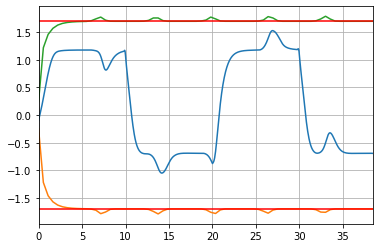

In [325]:
freq = [0.05]#0.04, 0.05, 0.08, 0.09]#, 0.03]#3, 0.04, 0.2, 0.02]#, 0.2, 0.7]#, 0.4]#, 0.05, 0.5]#, 0.08, 0.025]#, .02]#, .03]#, .05]#, .05, .07, .09]
dist = ['square']
# t_vect2 = np.linspace(0,t_vect[-1],len(t_vect))
w1l = 1
w2l = 1
# e = np.array([0.1,0.1,np.pi/100]) # Lie Group
# e0 = SE2(e[0], e[1], e[2]).log.vee # Lie Algebra
# omega0 = 0
# R1 = []
# R2 = []
# ly_val = []
# sol = find_se2_invariant_set(-np.pi/2, np.pi/2)
# zeta = iteration(w1l, w2l, e0, 0, sol)
# v1 = sv1(zeta[2])
# v2 = sv2(zeta[0], zeta[1],zeta[2])
# w1 = v1*w1l + v2*w2l
# w2 = w2l
for i, f in enumerate(freq):
    for d in dist:
        res = simulate_rover(planner, f, w1l, w2l, -0.1, -0.1, -np.pi/100, dist = d, dt=.05, use_approx = False)
        y_vect = res['y']
        x, y, theta, x_r, y_r, theta_r, log_e_x, log_e_y, log_e_theta = [y_vect[i, :] for i in range(len(y_vect))]
        err = np.array([compute_err(y[3], y[4], y[5], y[0], y[1], y[2]) for y in y_vect.T]).T
        err_y = err[1,:]
        plt.plot(res['t'], err_y)

plt.plot(t_vect, Ry1l)
plt.plot(t_vect, Ry2l)
plt.hlines(1.7, 0, t_vect[-1], color='red')
plt.hlines(-1.7, 0, t_vect[-1], color='red')

plt.xlim(0, t_vect[-1])
plt.grid()

# for i in range(len(t_vect)):
#     t = t_vect[i]
#     points = se2_lie_algebra_invariant_set_points(sol, t, w1, w2, e0) #Lie Algebra
#     inv_points = np.zeros((3,points.shape[1]))
#     for j in range(points.shape[1]):
#         exp_points = se2(points[0,j], points[1,j], points[2,j]).exp
#         inv_points[:,j] = np.array([exp_points.x, exp_points.y, exp_points.theta])
#     ang_list = []
#     a = int(t_vect[i]/0.05)
#     if i < 35:
#         b = int(t_vect[i+1]/0.05+1)
#     else:
#         b = int(res['t'][-1]/0.05)
#     for k in range(a, b):
#         angle = ref_theta(0.05*k)
#         ang_list.append(angle)
#     inv_set = [[],[]]
#     for theta in ang_list:
#         inv_set1 = rotate_point(inv_points, theta)
#         inv_set = np.append(inv_set, inv_set1, axis = 1)
#     inv_set = rotate_point(inv_set, -ref_theta(0.05*(a+b)/2))
    
#     max_y = inv_set[1,:].max()
#     min_y = abs(inv_set[1,:].min())
#     y_bound1 = np.round(min(max_y, min_y),6)
#     y_bound2 = np.round(max(max_y, min_y),6)
#     R1.append(y_bound1)
#     R2.append(y_bound2)
#     omega0 = omega(t)

# plt.plot(t_vect2, R1)
# plt.plot(t_vect2, R2)
# plt.hlines(1.7, 0, 40, color='red')

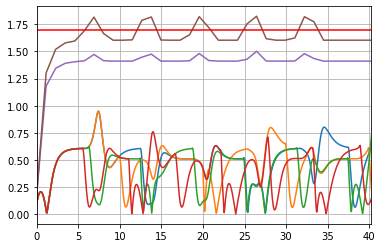

In [311]:
freq = [0.04, 0.05, 0.08, 0.09]#, 0.03]#3, 0.04, 0.2, 0.02]#, 0.2, 0.7]#, 0.4]#, 0.05, 0.5]#, 0.08, 0.025]#, .02]#, .03]#, .05]#, .05, .07, .09]
dist = ['square']
# t_vect2 = np.linspace(0,t_vect[-1],len(t_vect))
w1l = 1
w2l = 1
# e = np.array([0.1,0.1,np.pi/100]) # Lie Group
# e0 = SE2(e[0], e[1], e[2]).log.vee # Lie Algebra
# omega0 = 0
# R2 = []
# ly_val = []
# sol = find_se2_invariant_set(-np.pi/2, np.pi/2)
# zeta = iteration(w1l, w2l, e0, 0, sol)
# v1 = sv1(zeta[2])
# v2 = sv2(zeta[0], zeta[1],zeta[2])
# w1 = v1*w1l + v2*w2l
# w2 = w2l
for i, f in enumerate(freq):
    for d in dist:
        res = simulate_rover(planner, f, w1l, w2l, -0.1, -0.1, -np.pi/100, dist = d, dt=.05, use_approx = False)
        y_vect = res['y']
        x, y, theta, x_r, y_r, theta_r, log_e_x, log_e_y, log_e_theta = [y_vect[i, :] for i in range(len(y_vect))]
        err = np.array([compute_err(y[3], y[4], y[5], y[0], y[1], y[2]) for y in y_vect.T]).T
        err_x = err[0,:]
        plt.plot(res['t'], err_x)

plt.plot(t_vect, Rx1l)
plt.plot(t_vect, Rx2l)
plt.hlines(1.7, 0, t_vect[-1], color='red')
plt.xlim(0, t_vect[-1])
plt.grid()        

# for i in range(len(t_vect)):
#     t = t_vect[i]
#     points = se2_lie_algebra_invariant_set_points(sol, t, w1, w2, e0) #Lie Algebra
#     inv_points = np.zeros((3,points.shape[1]))
#     for j in range(points.shape[1]):
#         exp_points = se2(points[0,j], points[1,j], points[2,j]).exp
#         inv_points[:,j] = np.array([exp_points.x, exp_points.y, exp_points.theta])
#     ang_list = []
#     a = int(t_vect[i]/0.05)
#     if i < 35:
#         b = int(t_vect[i+1]/0.05+1)
#     else:
#         b = int(res['t'][-1]/0.05)
#     for k in range(a, b):
#         angle = ref_theta(0.05*k)
#         ang_list.append(angle)
#     inv_set = [[],[]]
#     for theta in ang_list:
#         inv_set1 = rotate_point(inv_points, theta)
#         inv_set = np.append(inv_set, inv_set1, axis = 1) 
#     set_bound = rotate_point(inv_set, -ref_theta(0.05*(a+b)/2))
    
#     max_x = inv_set[0,:].max()
#     min_x = abs(inv_set[0,:].min())
#     x_bound = np.round(min(max_x, min_x),6)
#     R.append(x_bound)
#     omega0 = omega(t)

# plt.plot(t_vect2, R)
# plt.hlines(1.7, 0, 40, color='red')

In [57]:
res = simulate_rover(planner, 0.05, w1l, w2l, 0.1, 0.1, np.pi/100, dist='square', dt=.05, use_approx = False)

(149, 277, 406, 534, 663)

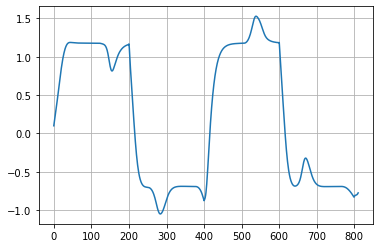

In [82]:
y_vect = res['y']
x, y, theta, x_r, y_r, theta_r, log_e_x, log_e_y, log_e_theta = [y_vect[i, :] for i in range(len(y_vect))]
errLie = np.array([compute_err(y[3], y[4], y[5], y[0], y[1], y[2]) for y in y_vect.T]).T
err_x = x - x_r
err_y = y - y_r
err = np.array([err_x, err_y])
err_rot = rotate_point(err, -theta_r)
plt.plot(err_rot[1,:])
plt.grid()
149, 277, 406, 534, 663

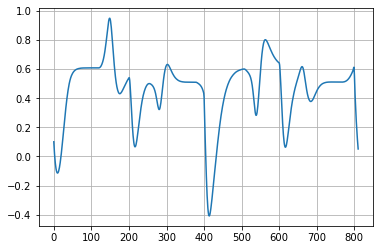

In [87]:
plt.plot(errLie[0,:])
plt.grid()

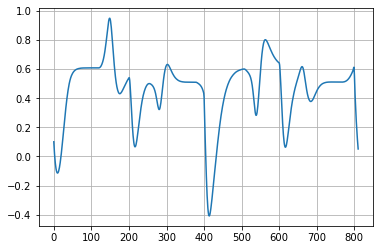

In [85]:
plt.plot(err_rot[0,:])
plt.grid(True)

In [86]:
err_rot[:,406]

array([-0.13847281, -0.71977616])

In [240]:
P = sol['P']
beta = (e0.T@P@e0) # V0
val = np.real(beta*np.exp(-sol['alpha']*t_vect) + (sol['mu1']*w1l**2 + sol['mu2']*w2l**2)*(1-np.exp(-sol['alpha']*t_vect)))

In [49]:
print(err_rot.shape)

(2, 811)
